# Project: Investigate the no show appointments dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I'll be doing some data analysis on a dataset that contains over 100000 hospital appointments in Brazil.
In this project, the question we'll be trying to find an answer for is why some people didn't show up for their appointments?
I'll try to figure out the reason why they didn't show up to their appointments and will be asking questions of my own, and then hopefully we'll get more idea about it.
The dataset contains a few important columns like:
1. Handcap: 1 if the patient is handycapped, 0 if not.
2. Age: The patient's age.
3. AppointmentDay: The date of the patient's appointment.
4. Scholarship: 1 if the patient is enrolled in the Brazilian health care program, 0 if not.
5. SMS_received: 1 if the patient has received an SMS telling them of their appointment, 0 if not.
6. No-show: 1 if the patient didn't show up to their appointment, 0 if they did.
Those aren't all the columns in the dataset, just the columns I used for the analysis.

In [38]:
#Lets import our libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

<a id='wrangling'></a>
## Data Wrangling

It's time to clean the data set

### General Properties

First we need to load our dataset

In [39]:
#Load the dataset
df =pd.read_csv('noshowappointments-kagglev2-may-2016.csv', na_values ='-')

Lets look at the data frame here

In [40]:
#show the data frame head
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We'll clean the AppointmentDay column so we only get the dates

In [41]:
#clean the AppointmentDay column
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], errors='coerce')
df['AppointmentDay'] =df['AppointmentDay'].dt.date
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


Check for missing values

In [42]:
#Check for missing values
print(df.isna().any().any())

False


We loaded the data and checked for missing values in the dataset. Luckily there aren't any.

Check if there any zeros or negative values in the age column and replace them with the mean
I wouldn't be doing the same for each column, because in the other columns we need for this analysis we don't need to check for negative values, and we already checked for missing values.

In [43]:
#Replace the values less than 1 in the age column withthe the mean
df[df['Age'] <1] =df['Age'].mean()

I didn't check for duplicate data because it's normal for a patient to have more than one appointment. In this case, having duplicate data isn't wrong.

<a id='eda'></a>
## Exploratory Data Analysis

### Why some people didn't show up to their appointments?

How many people did show to their appointments? and how many didn't?

In [44]:
#We'll group by to show the people who didn't show up, and the people who did
print(df.groupby(['No-show'], as_index=False)['No-show'].count())

   No-show
0     3540
1    85307
2    21680


Since we don't have to worry about the people who showed up, lets create a dataframe that includes only the people who didn't show up with all their data to reduce the noise.
We also need to put the number of the people who didn't show up in a variable so we can use it later

In [45]:
#We'll first filter the data set to get only the people who didn't show up, then we put them into a new data frame to use it in a bit
nsdf =df[df['No-show'] =='Yes']
no_showup =len(nsdf)

This graph shows the people who didn't show up in each appointment date

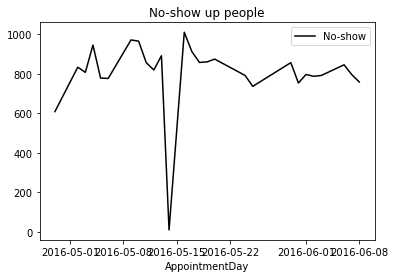

In [46]:
#Lets create a graph that shows the people who didn't go to their appointments per date
nsdf.groupby(['AppointmentDay'], as_index=False)['No-show'].count().plot(title ='No-show up people', x='AppointmentDay', y='No-show', kind='line', color='black');
plt.show()

How many people from those who didn't show up are enrolled in Brazilian health program?

In [47]:
#Check how many people are enrolled in health care
br_health =len(nsdf[nsdf['Scholarship'] ==1])
print (br_health)

2571


How many people weren't in the Brazilian health program and didn't get an SMS?

In [48]:
#Check how many people weren't enrolled in health care and didn't get an sms
nobr_nosms =len(nsdf[(nsdf['Scholarship'] ==0) & (nsdf['SMS_received'] ==0)])
print (nobr_nosms)

10721


How many of the people who didn't show up actually got an SMS?

In [49]:
#Check how many people didn't show up and didn't get sms
got_sms =len(nsdf[(nsdf['No-show'] =='Yes') & (nsdf['SMS_received'] ==1)])
print (got_sms)

9568


Lets see if handicapped people play a roll in this.
How many handycapped people who didn't show up?

In [50]:
#Check on handicapped people and how many of them didn't show up
handcap =len(nsdf[nsdf['Handcap'] ==1])
print (handcap)

366


How many handy capped did get an SMS, and still didn't show up?

In [51]:
#How many of the didn't show up handicapped didn't get an sms
handcap_sms =len(nsdf[(nsdf['Handcap'] ==1) & (nsdf['SMS_received'] ==1)  & (nsdf['No-show'] =='Yes')])
print(handcap_sms)

126


### What if we put the age factor in?

Lets explore some data about the age

What's the avrige age of those who didn't show up?

In [52]:
#Avrige age
mean_age =np.mean(nsdf['Age'])
print(mean_age)

35.329151291512915


How old is the oldest person who didn't show up for their appointment?

In [53]:
#Check how old is the oldest person
print(nsdf['Age'].max())

115.0


What's the most common age for the people who didn't show up?

In [54]:
#Check the most common age
common_age =df['Age'].mode()
print(common_age)

0    37.088874
dtype: float64


How many people didn't show up and were at the age of over 50?

In [55]:
#Check how many people are over the age of 50
over50 =len(nsdf[(nsdf['Age'] >=50)])
print (over50)

6018


This graph shows the average age per date

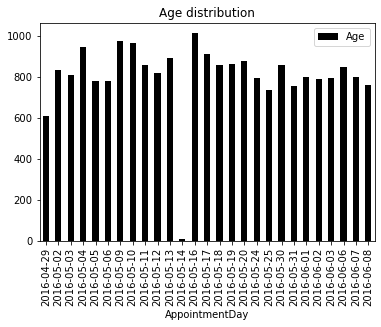

In [56]:
#Age average
nsdf.groupby(['AppointmentDay'], as_index=False)['Age'].count().plot(title ='Age distribution', kind='bar', color='black', x='AppointmentDay', y='Age');
plt.show()

<a id='conclusions'></a>
## Conclusions

We've calculated a few numbers in hope to answer a few questions that will help us figure out why they didn't show up.
Lets look at one more cell to see a report of all the stats we calculated.

In [57]:
#Print stats
print(f"Note:\nThe stats are only for the people who didn't show up for their appointments.\nNumber of people who didn't show up for their appointments: {no_showup}\nNumber of the people who are enrolled in Brazilian health care: {br_health}. That's {round(br_health/no_showup*100, 2)}%\n{got_sms} of the people who didn't show up have gotten an SMS. That's {round(got_sms/no_showup*100, 2)}%\n{handcap} of the people who didn't show up were handycapped. That's {round(handcap/no_showup*100, 2)}%. {handcap_sms} of them didn't even get an SMS.\nNumber of the people who didn't showup and were at the age of over 50: {over50}. That's{round(over50/no_showup*100, 2)}% of the total people who didn't show up.\nHowever, there are {nobr_nosms} people who weren't enrolled in the Brazilian health program and they also didn't get an SMS.\nThat makes {round(nobr_nosms/no_showup*100, 2)}%")

Note:
The stats are only for the people who didn't show up for their appointments.
Number of people who didn't show up for their appointments: 21680
Number of the people who are enrolled in Brazilian health care: 2571. That's 11.86%
9568 of the people who didn't show up have gotten an SMS. That's 44.13%
366 of the people who didn't show up were handycapped. That's 1.69%. 126 of them didn't even get an SMS.
Number of the people who didn't showup and were at the age of over 50: 6018. That's27.76% of the total people who didn't show up.
However, there are 10721 people who weren't enrolled in the Brazilian health program and they also didn't get an SMS.
That makes 49.45%



From the stats we gathered, we can tell that if a patient wasn't enrolled in the health program and didn't get an SMS, there is actually a big chance for them not to go to their appointments.
I faced a limitation here. I guess the fact that they're not enrolled and they didn't show up is probably because they don't get enough income to cover the hospital costs. I would have investigated this more if there was more data about it, say for an example a monthly income column so I can prove or disprove this fact.

When we look at the age, there is 26.62% of the people who didn't show up that are over the age of 50.

We conclude to the fact that if a patient didn't show up to their appointment, the most likely reason is that they weren't enrolled in the health care program along with them not getting an SMS.

The other reason is that probably they didn't get an SMS, since the number of people who didn't isn't small either, around 43.84%.

How ever if they are over the age of 50, then there is a bit more than 1/4 chances that it's because of their age.
